In [1]:


import cv2
import numpy as np 
import glob
from tqdm import tqdm
import PIL.ExifTags
import PIL.Image
import matplotlib.pyplot as plt


  0%|          | 0/19 [00:00<?, ?it/s]

Image loaded, Analizying...


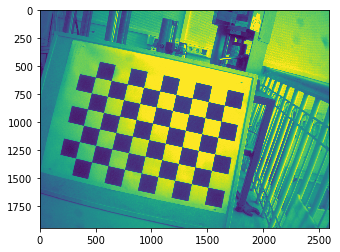

  5%|▌         | 1/19 [00:02<00:40,  2.26s/it]

Chessboard detected!
./calibration_images/12.JPG
Image loaded, Analizying...


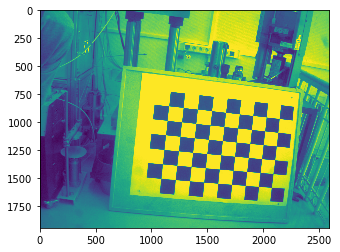

 11%|█         | 2/19 [00:03<00:31,  1.88s/it]

Chessboard detected!
./calibration_images/10.JPG
Image loaded, Analizying...


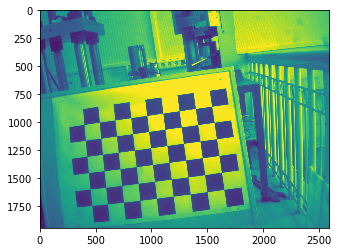

 16%|█▌        | 3/19 [00:05<00:29,  1.85s/it]

Chessboard detected!
./calibration_images/11.JPG
Image loaded, Analizying...


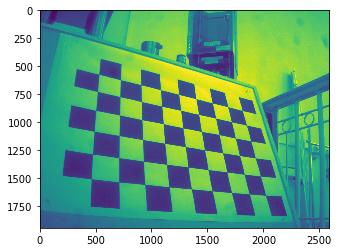

 21%|██        | 4/19 [00:06<00:27,  1.82s/it]

Chessboard detected!
./calibration_images/5.JPG
Image loaded, Analizying...


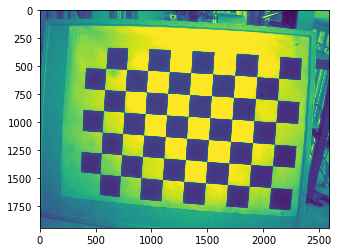

 26%|██▋       | 5/19 [00:07<00:22,  1.58s/it]

Chessboard detected!
./calibration_images/15.JPG
Image loaded, Analizying...


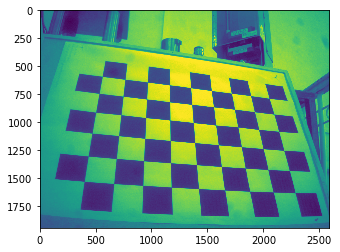

 32%|███▏      | 6/19 [00:09<00:22,  1.76s/it]

Chessboard detected!
./calibration_images/6.JPG
Image loaded, Analizying...


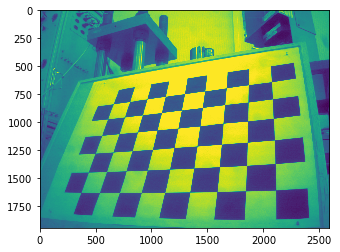

 37%|███▋      | 7/19 [00:12<00:23,  1.95s/it]

Chessboard detected!
./calibration_images/8.JPG
Image loaded, Analizying...


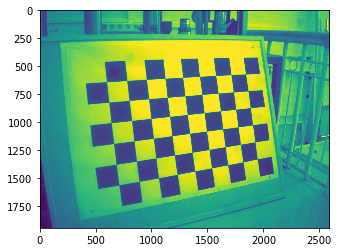

 42%|████▏     | 8/19 [00:13<00:19,  1.74s/it]

Chessboard detected!
./calibration_images/2.JPG
Image loaded, Analizying...


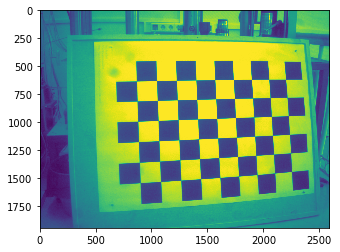

 47%|████▋     | 9/19 [00:14<00:15,  1.54s/it]

Chessboard detected!
./calibration_images/1.JPG
Image loaded, Analizying...


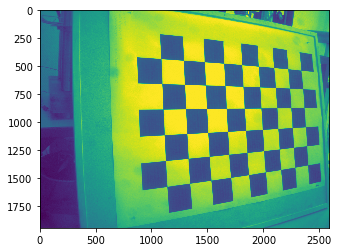

 53%|█████▎    | 10/19 [00:16<00:13,  1.50s/it]

Chessboard detected!
./calibration_images/19.JPG
Image loaded, Analizying...


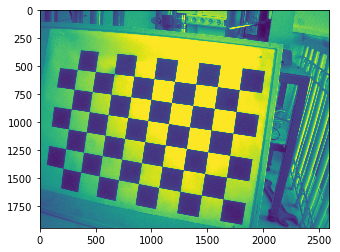

 58%|█████▊    | 11/19 [00:18<00:12,  1.62s/it]

Chessboard detected!
./calibration_images/14.JPG
Image loaded, Analizying...


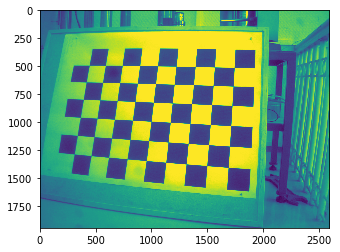

 63%|██████▎   | 12/19 [00:19<00:11,  1.69s/it]

Chessboard detected!
./calibration_images/9.JPG
Image loaded, Analizying...


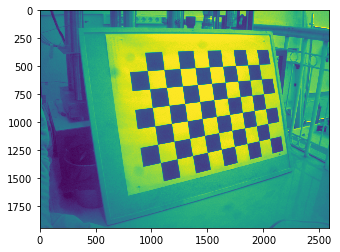

 68%|██████▊   | 13/19 [00:21<00:09,  1.62s/it]

Chessboard detected!
./calibration_images/3.JPG
Image loaded, Analizying...


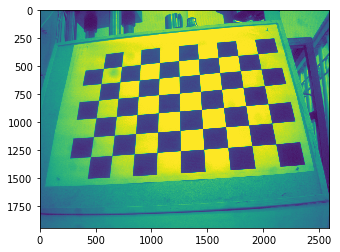

 74%|███████▎  | 14/19 [00:22<00:07,  1.50s/it]

Chessboard detected!
./calibration_images/7.JPG
Image loaded, Analizying...


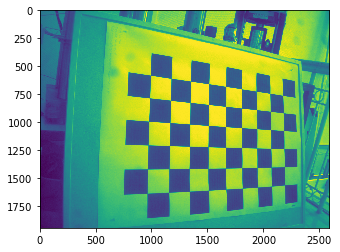

 79%|███████▉  | 15/19 [00:23<00:05,  1.40s/it]

Chessboard detected!
./calibration_images/18.JPG
Image loaded, Analizying...


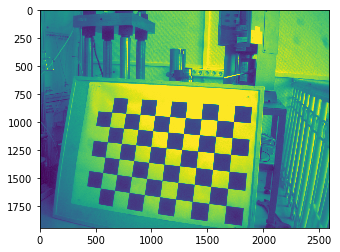

 84%|████████▍ | 16/19 [00:24<00:03,  1.32s/it]

Chessboard detected!
./calibration_images/13.JPG
Image loaded, Analizying...


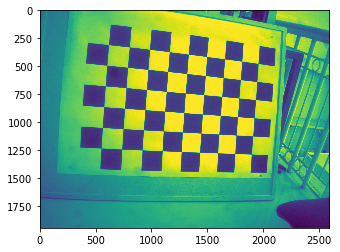

 89%|████████▉ | 17/19 [00:25<00:02,  1.27s/it]

Chessboard detected!
./calibration_images/16.JPG
Image loaded, Analizying...


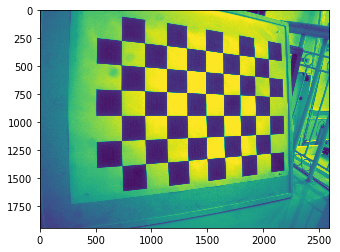

 95%|█████████▍| 18/19 [00:27<00:01,  1.24s/it]

Chessboard detected!
./calibration_images/17.JPG
Image loaded, Analizying...


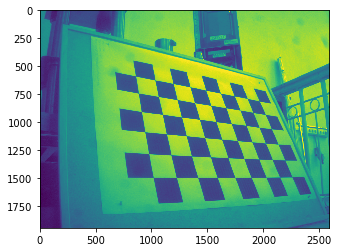

100%|██████████| 19/19 [00:29<00:00,  1.58s/it]

Chessboard detected!
./calibration_images/4.JPG


0.15585823355468587


In [2]:

#============================================
# Camera calibration
#============================================

#Define size of chessboard target. 

chessboard_size = (6,9)
#chessboard_size = (7,5)
#Define arrays to save detected points
obj_points = [] #3D points in real world space 
img_points = [] #3D points in image plane

#Prepare grid and points to display

objp = np.zeros((np.prod(chessboard_size),3),dtype=np.float32)


objp[:,:2] = np.mgrid[0:chessboard_size[0], 0:chessboard_size[1]].T.reshape(-1,2)

#read images

calibration_paths = glob.glob('./calibration_images/*')

#Iterate over images to find intrinsic matrix
for image_path in tqdm(calibration_paths):

    #Load image
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    print("Image loaded, Analizying...")
    #find chessboard corners
    plt.imshow(gray_image)
    plt.show()
    ret,corners = cv2.findChessboardCorners(gray_image, chessboard_size, None)

    if ret == True:
        print("Chessboard detected!")
        print(image_path)
        #define criteria for subpixel accuracy
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
        #refine corner location (to subpixel accuracy) based on criteria.
        cv2.cornerSubPix(gray_image, corners, (5,5), (-1,-1), criteria)
        obj_points.append(objp)
        img_points.append(corners)

#Calibrate camera
ret, K, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points,gray_image.shape[::-1], None, None)

#Save parameters into numpy file
np.save("./camera_params/ret", ret)
np.save("./camera_params/K", K)
np.save("./camera_params/dist", dist)
np.save("./camera_params/rvecs", rvecs)
np.save("./camera_params/tvecs", tvecs)


focal_length = 8

#Save focal length
np.save("./camera_params/FocalLength", focal_length)

#Calculate projection error. 
mean_error = 0
for i in range(len(obj_points)):
    img_points2, _ = cv2.projectPoints(obj_points[i],rvecs[i],tvecs[i], K, dist)
    error = cv2.norm(img_points[i], img_points2, cv2.NORM_L2)/len(img_points2)
    mean_error += error

total_error = mean_error/len(obj_points)
print (total_error)


In [9]:
K[1][2]

960.770920763194

In [5]:
K

array([[2.67212388e+03, 0.00000000e+00, 1.33050806e+03],
       [0.00000000e+00, 2.66647345e+03, 9.60770921e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [3]:
from ximea import xiapi
cam = xiapi.Camera()
cam.open_device()
focal_length = cam.get_lens_focal_length()
cam.close_device()
print('Done.')

Xi_error: ERROR 100: Unknown parameter

  0%|          | 0/2 [00:00<?, ?it/s]

Image loaded, Analizying...


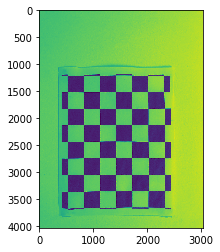

 50%|█████     | 1/2 [00:26<00:26, 26.10s/it]

Chessboard detected!
./calibration_images/IMG_7769.JPG
Image loaded, Analizying...


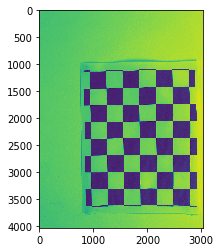

100%|██████████| 2/2 [00:50<00:00, 25.66s/it]

Chessboard detected!
./calibration_images/IMG_7770.JPG


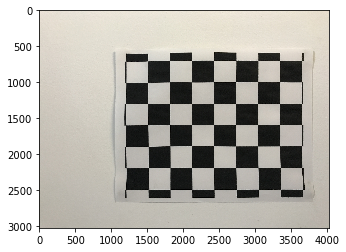

{34853: {1: 'N', 2: ((19, 1), (28, 1), (629, 100)), 3: 'W', 4: ((99, 1), (10, 1), (1614, 100)), 5: b'\x00', 6: (1210259, 538), 7: ((1, 1), (51, 1), (2882, 100)), 12: 'K', 13: (22913, 139861), 16: 'T', 17: (108755, 572), 23: 'T', 24: (108755, 572), 29: '2018:12:31', 31: (64, 1)}, 296: 2, 34665: 206, 271: 'Apple', 272: 'iPhone 7', 305: '12.1.2', 274: 6, 306: '2018:12:30 19:51:29', 531: 1, 282: (72, 1), 283: (72, 1), 36864: b'0221', 37121: b'\x01\x02\x03\x00', 37377: (62712, 16045), 36867: '2018:12:30 19:51:29', 36868: '2018:12:30 19:51:29', 37378: (54823, 32325), 37379: (67077, 24437), 37380: (0, 1), 37383: 5, 37385: 24, 37386: (399, 100), 40961: 65535, 40962: 4032, 41989: 28, 41990: 0, 40963: 3024, 37521: '648', 37522: '648', 37396: (2015, 1511, 2217, 1330), 41495: 2, 33434: (1, 15), 33437: (9, 5), 41729: b'\x01', 34850: 2, 34855: 40, 41986: 0, 40960: b'0100', 41987: 0, 42034: ((399, 100), (399, 100), (9, 5), (9, 5)), 42035: 'Apple', 42036: 'iPhone 7 back camera 3.99mm f/1.8', 37500: b'

In [2]:

#============================================
# Camera calibration
#============================================

#Define size of chessboard target. 

#chessboard_size = (6,9)
chessboard_size = (7,5)
#Define arrays to save detected points
obj_points = [] #3D points in real world space 
img_points = [] #3D points in image plane

#Prepare grid and points to display

objp = np.zeros((np.prod(chessboard_size),3),dtype=np.float32)


objp[:,:2] = np.mgrid[0:chessboard_size[0], 0:chessboard_size[1]].T.reshape(-1,2)

#read images

calibration_paths = glob.glob('./calibration_images/*')

#Iterate over images to find intrinsic matrix
for image_path in tqdm(calibration_paths):

    #Load image
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    print("Image loaded, Analizying...")
    #find chessboard corners
    plt.imshow(gray_image)
    plt.show()
    ret,corners = cv2.findChessboardCorners(gray_image, chessboard_size, None)

    if ret == True:
        print("Chessboard detected!")
        print(image_path)
        #define criteria for subpixel accuracy
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
        #refine corner location (to subpixel accuracy) based on criteria.
        cv2.cornerSubPix(gray_image, corners, (5,5), (-1,-1), criteria)
        obj_points.append(objp)
        img_points.append(corners)

#Calibrate camera
ret, K, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points,gray_image.shape[::-1], None, None)

#Save parameters into numpy file
np.save("./camera_params/ret", ret)
np.save("./camera_params/K", K)
np.save("./camera_params/dist", dist)
np.save("./camera_params/rvecs", rvecs)
np.save("./camera_params/tvecs", tvecs)

#Get exif data in order to get focal length. 
exif_img = PIL.Image.open(calibration_paths[0])
plt.imshow(exif_img)
plt.show()
print(exif_img._getexif())
print(dir(exif_img))
exif_data = {
    PIL.ExifTags.TAGS[k]:v
    for k, v in exif_img._getexif().items()
    if k in PIL.ExifTags.TAGS}

#Get focal length in tuple form
focal_length_exif = exif_data['FocalLength']

#Get focal length in decimal form
focal_length = focal_length_exif[0]/focal_length_exif[1]

#Save focal length
np.save("./camera_params/FocalLength", focal_length)

#Calculate projection error. 
mean_error = 0
for i in range(len(obj_points)):
    img_points2, _ = cv2.projectPoints(obj_points[i],rvecs[i],tvecs[i], K, dist)
    error = cv2.norm(img_points[i], img_points2, cv2.NORM_L2)/len(img_points2)
    mean_error += error

total_error = mean_error/len(obj_points)
print (total_error)


In [2]:
%run calibrate.py

  0%|          | 0/19 [00:00<?, ?it/s]

Image loaded, Analizying...


<Figure size 640x480 with 1 Axes>

  5%|▌         | 1/19 [00:01<00:26,  1.45s/it]

Chessboard detected!
./calibration_images/12.JPG
Image loaded, Analizying...


<Figure size 640x480 with 1 Axes>

 11%|█         | 2/19 [00:01<00:19,  1.15s/it]

Chessboard detected!
./calibration_images/10.JPG
Image loaded, Analizying...


<Figure size 640x480 with 1 Axes>

 16%|█▌        | 3/19 [00:03<00:19,  1.20s/it]

Chessboard detected!
./calibration_images/11.JPG
Image loaded, Analizying...


<Figure size 640x480 with 1 Axes>

 21%|██        | 4/19 [00:04<00:18,  1.23s/it]

Chessboard detected!
./calibration_images/5.JPG
Image loaded, Analizying...


<Figure size 640x480 with 1 Axes>

 26%|██▋       | 5/19 [00:04<00:14,  1.01s/it]

Chessboard detected!
./calibration_images/15.JPG
Image loaded, Analizying...


<Figure size 640x480 with 1 Axes>

 32%|███▏      | 6/19 [00:06<00:13,  1.01s/it]

Chessboard detected!
./calibration_images/6.JPG
Image loaded, Analizying...


<Figure size 640x480 with 1 Axes>

 37%|███▋      | 7/19 [00:07<00:14,  1.24s/it]

Chessboard detected!
./calibration_images/8.JPG
Image loaded, Analizying...


<Figure size 640x480 with 1 Axes>

 42%|████▏     | 8/19 [00:08<00:11,  1.04s/it]

Chessboard detected!
./calibration_images/2.JPG
Image loaded, Analizying...


<Figure size 640x480 with 1 Axes>

 47%|████▋     | 9/19 [00:08<00:08,  1.11it/s]

Chessboard detected!
./calibration_images/1.JPG
Image loaded, Analizying...


<Figure size 640x480 with 1 Axes>

 53%|█████▎    | 10/19 [00:09<00:06,  1.29it/s]

Chessboard detected!
./calibration_images/19.JPG
Image loaded, Analizying...


<Figure size 640x480 with 1 Axes>

 58%|█████▊    | 11/19 [00:10<00:06,  1.21it/s]

Chessboard detected!
./calibration_images/14.JPG
Image loaded, Analizying...


<Figure size 640x480 with 1 Axes>

 63%|██████▎   | 12/19 [00:10<00:04,  1.41it/s]

Chessboard detected!
./calibration_images/9.JPG
Image loaded, Analizying...


<Figure size 640x480 with 1 Axes>

 68%|██████▊   | 13/19 [00:11<00:03,  1.57it/s]

Chessboard detected!
./calibration_images/3.JPG
Image loaded, Analizying...


<Figure size 640x480 with 1 Axes>

 74%|███████▎  | 14/19 [00:11<00:02,  1.70it/s]

Chessboard detected!
./calibration_images/7.JPG
Image loaded, Analizying...


<Figure size 640x480 with 1 Axes>

 79%|███████▉  | 15/19 [00:12<00:02,  1.71it/s]

Chessboard detected!
./calibration_images/18.JPG
Image loaded, Analizying...


<Figure size 640x480 with 1 Axes>

 84%|████████▍ | 16/19 [00:12<00:01,  1.85it/s]

Chessboard detected!
./calibration_images/13.JPG
Image loaded, Analizying...


<Figure size 640x480 with 1 Axes>

 89%|████████▉ | 17/19 [00:13<00:01,  1.91it/s]

Chessboard detected!
./calibration_images/16.JPG
Image loaded, Analizying...


<Figure size 640x480 with 1 Axes>

 95%|█████████▍| 18/19 [00:13<00:00,  1.96it/s]

Chessboard detected!
./calibration_images/17.JPG
Image loaded, Analizying...


<Figure size 640x480 with 1 Axes>

100%|██████████| 19/19 [00:15<00:00,  1.13it/s]

Chessboard detected!
./calibration_images/4.JPG


0.15585823355468587
